# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.models import Model
from keras.layers import Dense, Input

def build_mlp(units, neurons, output_units = 10):

  input_layer = Input(units)

  for i, neuron in enumerate(neurons):
    if i == 0:
      x = Dense(neuron, activation = 'relu')(input_layer)
    else:
      x = Dense(neuron, activation = 'relu')(x)

  out = Dense(output_units, activation = 'softmax')(x)

  model = Model(inputs = [input_layer], outputs = [out])
    
  return model




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
"""
Set your required experiment parameters
"""
learning_rates = [0.001, 0.0001, 0.00001]
batch_size = 256
epochs = 30

In [28]:
results = {}

neurons = [512, 256, 128]
for lr in learning_rates:

  model = build_mlp(x_train.shape[1:], neurons)
  model.summary()

  optimizer = keras.optimizers.RMSprop(lr = 0.0001)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test), shuffle = True)

  exp_name = 'lr=%f'%lr
  acc = model.history.history['acc']
  val_acc = model.history.history['val_acc']
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']
  results[exp_name] = {
      'acc':acc,
      'val_acc':val_acc,
      'loss':loss,
      'val_loss':val_loss
  }

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_66 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 27

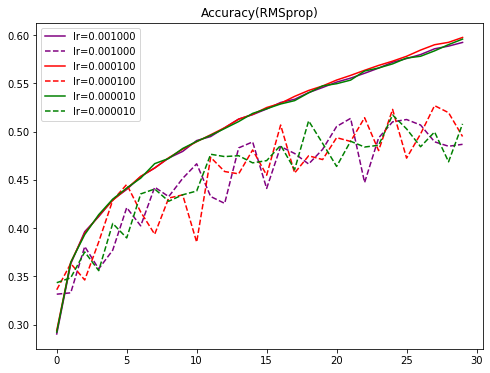

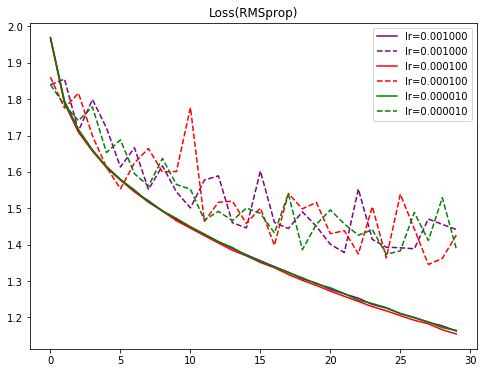

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["purple", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['acc'])), results[result]['acc'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_acc'])), results[result]['val_acc'], '--', label = result, color = color_bar[i])

plt.title('Accuracy(RMSprop)')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['loss'])), results[result]['loss'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_loss'])), results[result]['val_loss'], '--', label = result, color = color_bar[i])

plt.title('Loss(RMSprop)')
plt.legend()
plt.show()

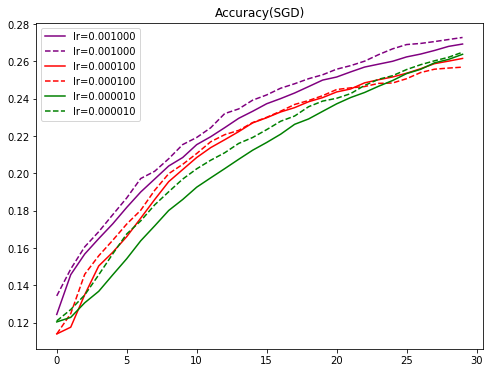

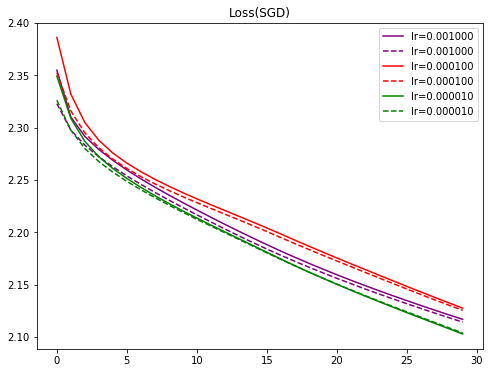

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["purple", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['acc'])), results[result]['acc'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_acc'])), results[result]['val_acc'], '--', label = result, color = color_bar[i])

plt.title('Accuracy(SGD)')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['loss'])), results[result]['loss'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_loss'])), results[result]['val_loss'], '--', label = result, color = color_bar[i])

plt.title('Loss(SGD)')
plt.legend()
plt.show()

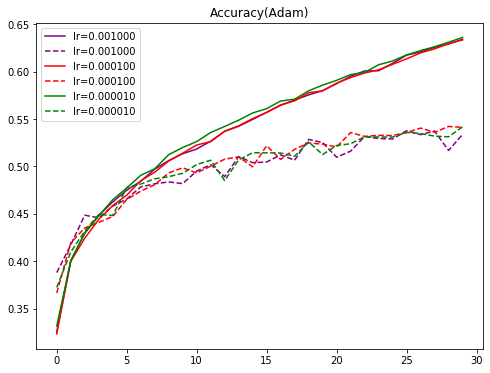

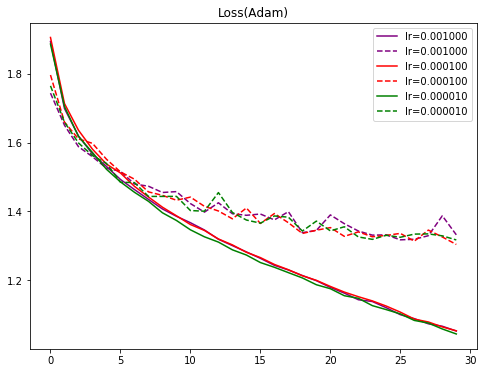

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["purple", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['acc'])), results[result]['acc'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_acc'])), results[result]['val_acc'], '--', label = result, color = color_bar[i])

plt.title('Accuracy(Adam)')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['loss'])), results[result]['loss'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['val_loss'])), results[result]['val_loss'], '--', label = result, color = color_bar[i])

plt.title('Loss(Adam)')
plt.legend()
plt.show()